In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Import mnist dataset for 28x28 pixels

In [6]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
x, y = mnist["data"].values, mnist["target"].values
y = y.astype(np.float64)

5.0


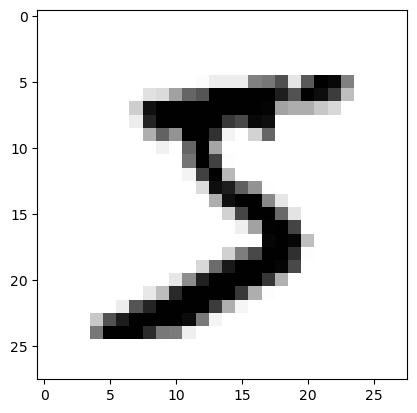

In [8]:
n = 0
plt.imshow(x[n].reshape(28,28), cmap="binary")
print(y[n])
plt.show()

In [24]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [10]:
sgd_clf = SGDClassifier()

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3)
sgd_clf.fit(x_train, y_train)

SGDClassifier()

[5.]


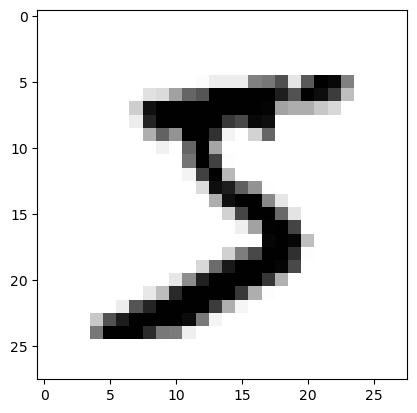

In [12]:
n = 0
plt.imshow(x[n].reshape(28,28), cmap="binary")
print(sgd_clf.predict([x[n]]))
plt.show()

In [15]:
pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
conf_nx = confusion_matrix(y_train, pred)
clf_report = classification_report(y_train, pred)

In [16]:
print(conf_nx)
print(clf_report)

[[4711    0   28   22    8   26   10    5   68    7]
 [   0 5228   57   25    5   23    7   16  174   25]
 [  54   47 4290  118   45   17   39   63  204   19]
 [  38   11  232 3851    6  304   11   55  289   89]
 [  30   15   53   31 4223   17   23   29  170  284]
 [  82   12   53  161   46 3464   66   26  400   89]
 [  60    7  106   31   40  139 4227    4  135    7]
 [  31   18   53   47   34   11    4 4442   67  340]
 [  56   54   89  155   22  164   22   20 4092  138]
 [  26   15   29   82  120   39    1  191  263 4118]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      4885
         1.0       0.97      0.94      0.95      5560
         2.0       0.86      0.88      0.87      4896
         3.0       0.85      0.79      0.82      4886
         4.0       0.93      0.87      0.90      4875
         5.0       0.82      0.79      0.81      4399
         6.0       0.96      0.89      0.92      4756
         7.0       0.92      0.88   

<Axes: >

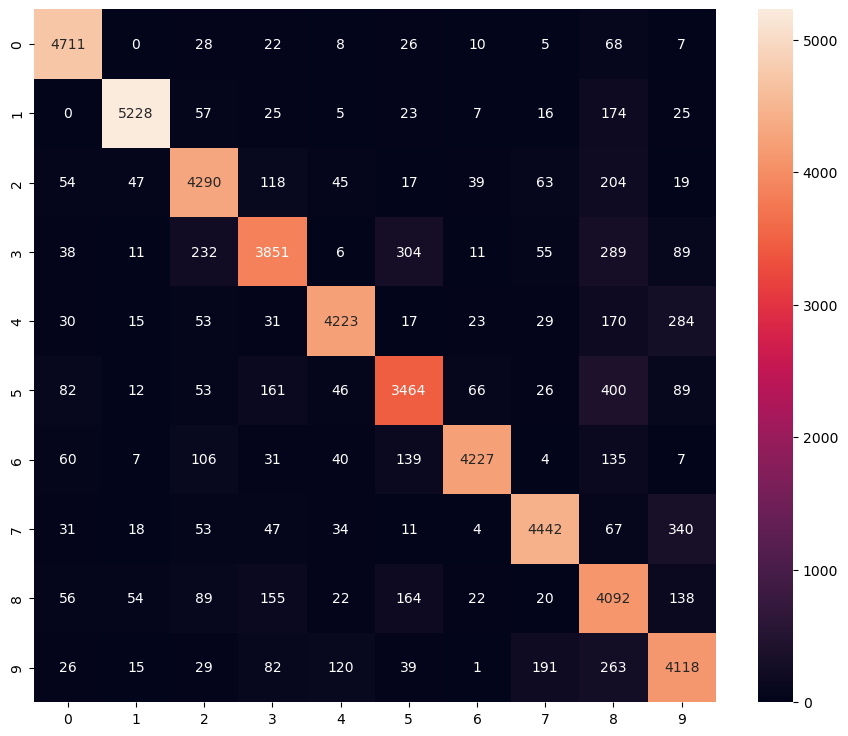

In [19]:
fig, ax = plt.subplots(figsize=(11,9))
sns.heatmap(conf_nx, annot=True,fmt=".0f")

<Axes: >

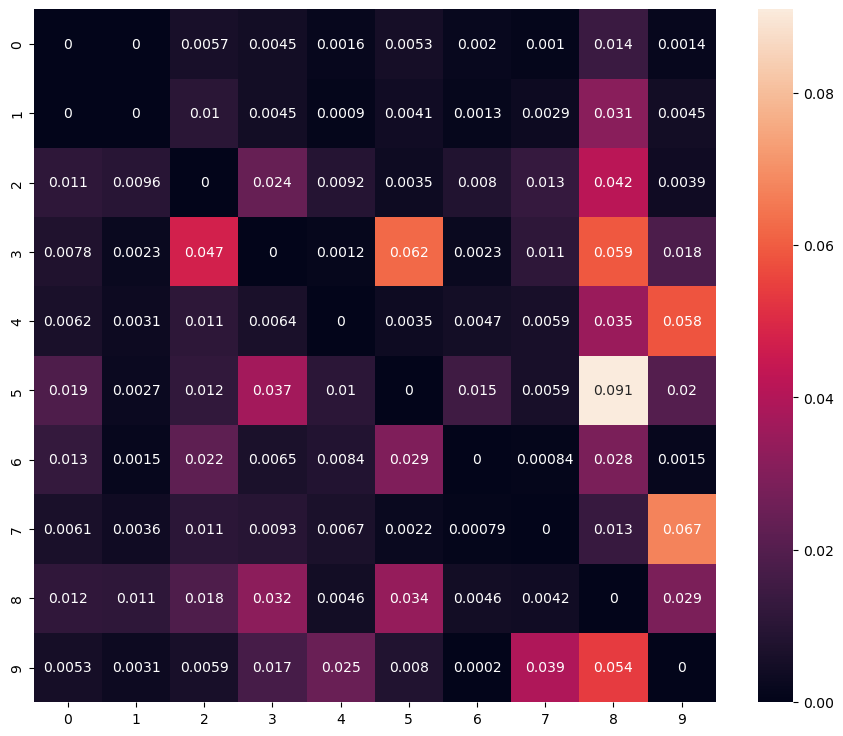

In [22]:
rows_sums = conf_nx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_nx / rows_sums
np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(11,9))
sns.heatmap(norm_conf_mx, ax=ax, annot=True)

# Multilabel Output

In [26]:

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [28]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

[[False  True]]


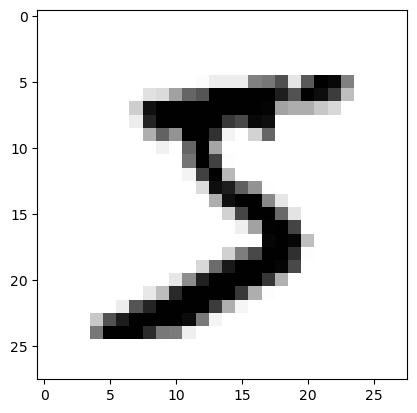

In [29]:
n = 0
plt.imshow(x[n].reshape(28,28), cmap="binary")
print(knn_clf.predict([x[n]]))
plt.show()